In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]

In [5]:
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot.csv")
de_all = pd.read_csv("results/de/DE-active/scale2max/all_landscape_de_summary.csv")

In [16]:
mlde_all.columns

Index(['encoding', 'model', 'n_sample', 'ft_lib', 'rep', 'all_maxes',
       'all_means', 'top_maxes', 'top_means', 'ndcgs', 'rhos', 'if_truemaxs',
       'truemax_inds', 'n_mut_cutoff', 'lib', 'zs', 'n_top', 'scale_fit'],
      dtype='object')

In [29]:
avg_mlde = mlde_all[
    (mlde_all["zs"] == "none")
    & (mlde_all["n_top"] == 96)
    & (mlde_all["n_mut_cutoff"] == "all")
][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})
avg_mlde

,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,24,0.482933,0.375691,0.089286,0.285258
1,48,0.547164,0.379115,0.147857,0.355085
2,96,0.637738,0.371056,0.247857,0.431923
3,192,0.701023,0.358166,0.335000,0.472159
4,288,0.737540,0.343149,0.392857,0.488560
5,384,0.747245,0.340636,0.409286,0.491790
6,480,0.779634,0.323146,0.459286,0.498518
7,576,0.795640,0.312706,0.483571,0.499909
8,960,0.842118,0.279887,0.572857,0.494840
9,1920,0.867727,0.257865,0.614286,0.486938


In [58]:
de_all.columns

Index(['lib', 'de_type', 'max', 'mean_all', 'median_all', 'mean_top96',
       'median_top96', 'mean_top384', 'median_top384', 'fraction_max',
       'numb_path'],
      dtype='object')

In [59]:
de_avg = de_all[["de_type", "mean_all", "fraction_max"]].groupby("de_type").agg(["mean", "std"])
de_avg.columns = ['{}_{}'.format(i, j) for i, j in de_avg.columns]
de_avg = de_avg.rename(columns={'de_type_': 'de_type'})
de_avg

,mean_all_mean,mean_all_std,fraction_max_mean,fraction_max_std
de_type,,,,
recomb_SSM,0.564960,0.242831,0.139143,0.118556
single_step_DE,0.612200,0.246041,0.242255,0.156875
top96_SSM,0.675433,0.266928,0.367315,0.242020


In [55]:
from SSMuLA.de_simulations import DE_COLORS, DE_TYPES, DE_LEGEND_MAP
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE

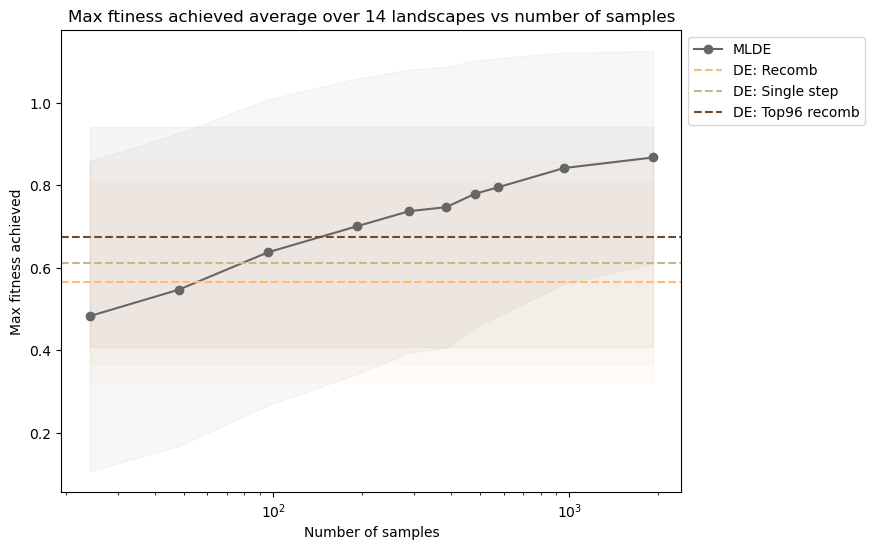

In [57]:
# for avg cross number of samples

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(
    avg_mlde["n_sample"],
    avg_mlde["top_maxes_mean"],
    label="MLDE",
    marker="o",
    linestyle="solid",
    color=PRESENTATION_PALETTE_SATURATE["gray"],
)
ax.fill_between(
    avg_mlde["n_sample"],
    avg_mlde["top_maxes_mean"] - avg_mlde["top_maxes_std"],
    avg_mlde["top_maxes_mean"] + avg_mlde["top_maxes_std"],
    color=PRESENTATION_PALETTE_SATURATE["gray"],
    alpha=0.05,
)

for de in DE_TYPES:
    ax.axhline(
        de_avg.loc[de, "mean_all_mean"],
        label=f"DE: {DE_LEGEND_MAP[de]}",
        color=DE_COLORS[de],
        linestyle="dashed",
    )
    ax.fill_between(
        avg_mlde["n_sample"],
        de_avg.loc[de, "mean_all_mean"] - de_avg.loc[de, "mean_all_std"],
        de_avg.loc[de, "mean_all_mean"] + de_avg.loc[de, "mean_all_std"],
        color=DE_COLORS[de],
        alpha=0.05,
    )

ax.set_xscale("log")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Max fitness achieved")
ax.set_title("Max ftiness achieved average over 14 landscapes vs number of samples")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

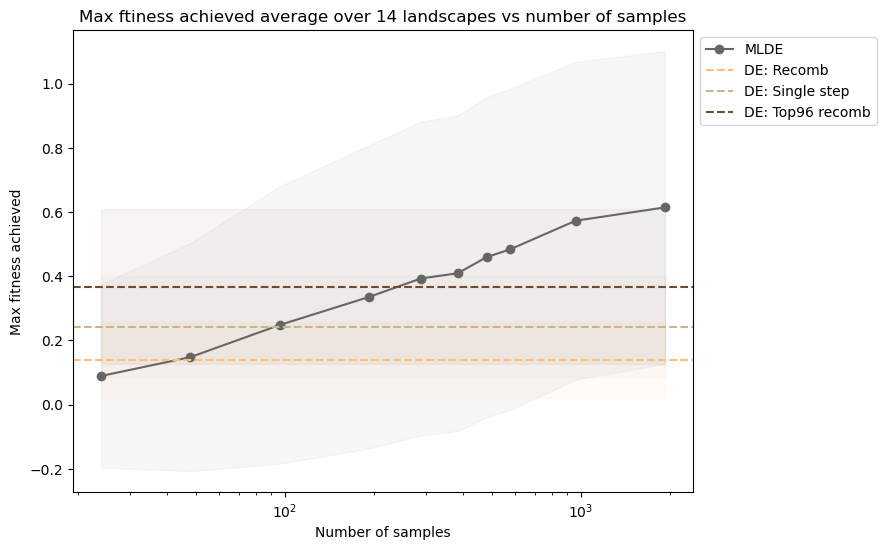

In [60]:
# for avg cross number of samples

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(
    avg_mlde["n_sample"],
    avg_mlde["if_truemaxs_mean"],
    label="MLDE",
    marker="o",
    linestyle="solid",
    color=PRESENTATION_PALETTE_SATURATE["gray"],
)
ax.fill_between(
    avg_mlde["n_sample"],
    avg_mlde["if_truemaxs_mean"] - avg_mlde["if_truemaxs_std"],
    avg_mlde["if_truemaxs_mean"] + avg_mlde["if_truemaxs_std"],
    color=PRESENTATION_PALETTE_SATURATE["gray"],
    alpha=0.05,
)

for de in DE_TYPES:
    ax.axhline(
        de_avg.loc[de, "fraction_max_mean"],
        label=f"DE: {DE_LEGEND_MAP[de]}",
        color=DE_COLORS[de],
        linestyle="dashed",
    )
    ax.fill_between(
        avg_mlde["n_sample"],
        de_avg.loc[de, "fraction_max_mean"] - de_avg.loc[de, "fraction_max_std"],
        de_avg.loc[de, "fraction_max_mean"] + de_avg.loc[de, "fraction_max_std"],
        color=DE_COLORS[de],
        alpha=0.05,
    )

ax.set_xscale("log")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Fraction of fitness = 1 achieved")
ax.set_title("Fraction of fitness = 1 achieved average over 14 landscapes vs number of samples")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [63]:
from SSMuLA.vis import LIB_COLORS

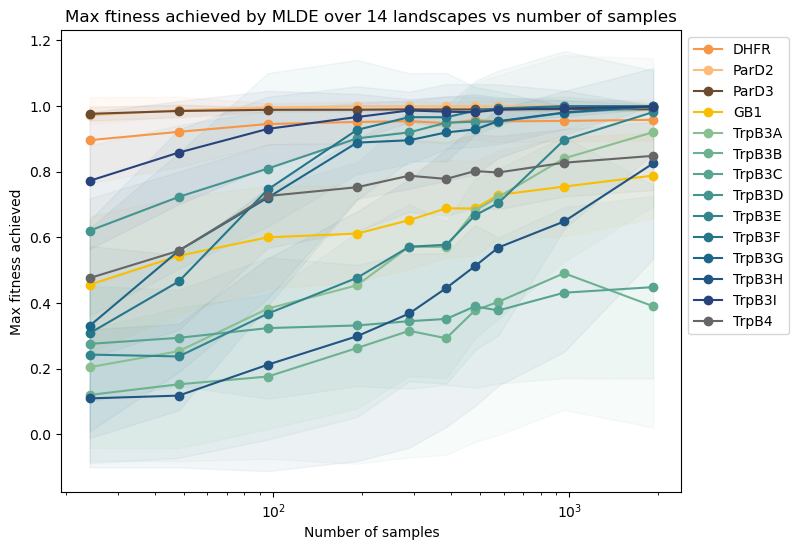

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))


# count number of mlde > de
for lib, lib_c in LIB_COLORS.items():
    avg_mlde = mlde_all[
        (mlde_all["zs"] == "none")
        & (mlde_all["n_top"] == 96)
        & (mlde_all["n_mut_cutoff"] == "all")
        & (mlde_all["lib"] == lib)
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})

    de_avg = de_all[["de_type", "mean_all", "fraction_max"]].groupby("de_type").agg(["mean", "std"])
    de_avg.columns = ['{}_{}'.format(i, j) for i, j in de_avg.columns]
    de_avg = de_avg.rename(columns={'de_type_': 'de_type'})

    ax.plot(
        avg_mlde["n_sample"],
        avg_mlde["top_maxes_mean"],
        label=lib,
        marker="o",
        linestyle="solid",
        color=lib_c,
    )
    ax.fill_between(
        avg_mlde["n_sample"],
        avg_mlde["top_maxes_mean"] - avg_mlde["top_maxes_std"],
        avg_mlde["top_maxes_mean"] + avg_mlde["top_maxes_std"],
        color=lib_c,
        alpha=0.05,
    )

    # for de in DE_TYPES:
    #     ax.axhline(
    #         de_avg.loc[de, "mean_all_mean"],
    #         label=f"DE: {DE_LEGEND_MAP[de]}",
    #         color=DE_COLORS[de],
    #         linestyle="dashed",
    #     )
    #     ax.fill_between(
    #         avg_mlde["n_sample"],
    #         de_avg.loc[de, "mean_all_mean"] - de_avg.loc[de, "mean_all_std"],
    #         de_avg.loc[de, "mean_all_mean"] + de_avg.loc[de, "mean_all_std"],
    #         color=DE_COLORS[de],
    #         alpha=  0.05,
    #     )

ax.set_xscale("log")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Max fitness achieved")
ax.set_title("Max ftiness achieved by MLDE over 14 landscapes vs number of samples")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

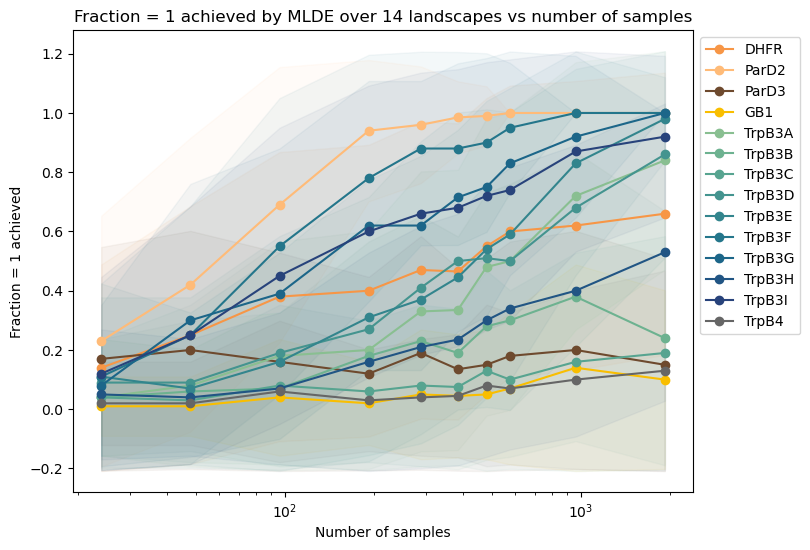

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))


# count number of mlde > de
for lib, lib_c in LIB_COLORS.items():
    avg_mlde = mlde_all[
        (mlde_all["zs"] == "none")
        & (mlde_all["n_top"] == 96)
        & (mlde_all["n_mut_cutoff"] == "all")
        & (mlde_all["lib"] == lib)
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})

    de_avg = de_all[["de_type", "mean_all", "fraction_max"]].groupby("de_type").agg(["mean", "std"])
    de_avg.columns = ['{}_{}'.format(i, j) for i, j in de_avg.columns]
    de_avg = de_avg.rename(columns={'de_type_': 'de_type'})

    ax.plot(
        avg_mlde["n_sample"],
        avg_mlde["if_truemaxs_mean"],
        label=lib,
        marker="o",
        linestyle="solid",
        color=lib_c,
    )
    ax.fill_between(
        avg_mlde["n_sample"],
        avg_mlde["if_truemaxs_mean"] - avg_mlde["if_truemaxs_std"],
        avg_mlde["if_truemaxs_mean"] + avg_mlde["if_truemaxs_std"],
        color=lib_c,
        alpha=0.05,
    )

    # for de in DE_TYPES:
    #     ax.axhline(
    #         de_avg.loc[de, "mean_all_mean"],
    #         label=f"DE: {DE_LEGEND_MAP[de]}",
    #         color=DE_COLORS[de],
    #         linestyle="dashed",
    #     )
    #     ax.fill_between(
    #         avg_mlde["n_sample"],
    #         de_avg.loc[de, "mean_all_mean"] - de_avg.loc[de, "mean_all_std"],
    #         de_avg.loc[de, "mean_all_mean"] + de_avg.loc[de, "mean_all_std"],
    #         color=DE_COLORS[de],
    #         alpha=  0.05,
    #     )

ax.set_xscale("log")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Fraction = 1 achieved")
ax.set_title("Fraction = 1 achieved by MLDE over 14 landscapes vs number of samples")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [68]:
avg_mlde

,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,24,0.476022,0.243110,0.020,0.140705
1,48,0.559382,0.240760,0.020,0.140705
2,96,0.726207,0.157845,0.060,0.238683
3,192,0.752871,0.132906,0.030,0.171447
4,288,0.787961,0.110229,0.040,0.196946
5,384,0.778225,0.111538,0.045,0.207824
6,480,0.802064,0.112643,0.080,0.272660
7,576,0.797841,0.111567,0.070,0.256432
8,960,0.827611,0.102466,0.100,0.301511
9,1920,0.848582,0.104002,0.130,0.337998


In [74]:
def get_min_sample(df, x):
    # Filter the DataFrame to find rows where 'top_maxes_mean' exceeds x
    filtered_df = df[df['top_maxes_mean'] > x]
    
    # Find the minimum 'n_sample' from the filtered DataFrame
    min_n_sample = filtered_df['n_sample'].min()
    
    return min_n_sample

In [89]:
# init dataframe with lib, 3 different de
# count number of mlde > de
count_n_df = pd.DataFrame(columns=["lib"] + DE_TYPES)

for lib, lib_c in LIB_COLORS.items():
    avg_mlde = mlde_all[
        (mlde_all["zs"] == "none")
        & (mlde_all["n_top"] == 96)
        & (mlde_all["n_mut_cutoff"] == "all")
        & (mlde_all["lib"] == lib)
    ][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
    avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})

    append_dict = {"lib": lib}

    for de in DE_TYPES:
        de_val = de_all[(de_all["de_type"] == de) & (de_all["lib"] == lib)]["mean_all"].values[0]
        append_dict[de] = get_min_sample(avg_mlde, de_val)
    
    count_n_df = count_n_df._append(append_dict, ignore_index=True)
count_n_df

,lib,recomb_SSM,single_step_DE,top96_SSM
0,DHFR,24,24,NaN
1,ParD2,24,24,96
2,ParD3,24,48,96
3,GB1,24,96,192
4,TrpB3A,192,192,192
5,TrpB3B,288,288,288
6,TrpB3C,480,480,480
7,TrpB3D,48,96,192
8,TrpB3E,96,96,96
9,TrpB3F,96,96,192


In [90]:
df_melted

,lib,experiment,value
0,DHFR,recomb_SSM,2.400000e+01
1,ParD2,recomb_SSM,2.400000e+01
2,ParD3,recomb_SSM,2.400000e+01
3,GB1,recomb_SSM,2.400000e+01
4,TrpB3A,recomb_SSM,1.920000e+02
5,TrpB3B,recomb_SSM,2.880000e+02
6,TrpB3C,recomb_SSM,4.800000e+02
7,TrpB3D,recomb_SSM,4.800000e+01
8,TrpB3E,recomb_SSM,9.600000e+01
9,TrpB3F,recomb_SSM,9.600000e+01


/tmp/ipykernel_3158912/2260581873.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  count_n_df = count_n_df.fillna(1e3)


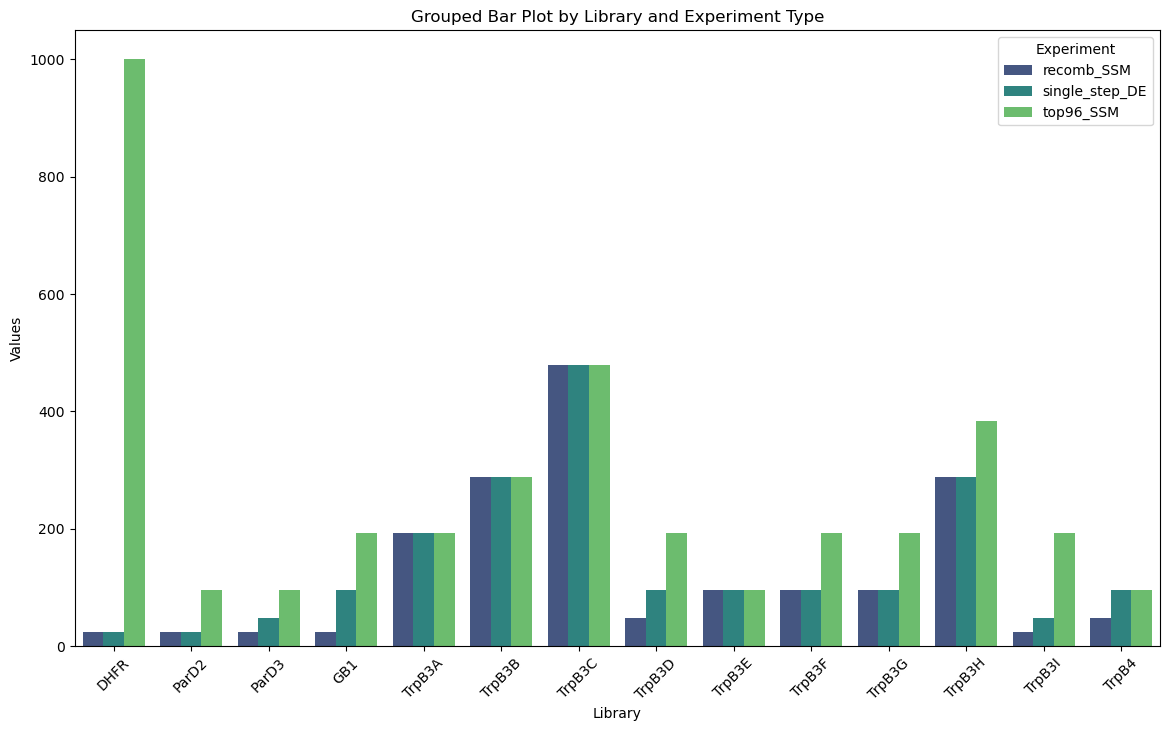

In [91]:
# Replacing NaN with a string for categorical plotting
count_n_df = count_n_df.fillna(1e3)

# Melt and plot
df_melted = count_n_df.melt(id_vars='lib', var_name='experiment', value_name='value')
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='lib', y='value', hue='experiment', data=df_melted, palette='viridis')
plt.xticks(rotation=45)
plt.title('Grouped Bar Plot by Library and Experiment Type')
plt.xlabel('Library')
plt.ylabel('Values')
plt.legend(title='Experiment')

# Annotate 'Unbounded'
for p in barplot.patches:
    height = p.get_height()
    if height >= 1e9:  # Check if the patch height corresponds to the 'unbounded' value
        barplot.annotate('Unbounded', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', fontsize=9, color='black', rotation=90, xytext=(0, 5),
                         textcoords='offset points')
plt.show()
